# DNN for Regression

We are going to work with Concrete Compressive Strength Data Set.

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

#### Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import tensorflow as tf
import seaborn as sn

In [2]:
plt.rcParams["figure.figsize"] = (18,8)

#### Load dataset

In [3]:
#https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength
dataset = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water (component 4)(kg in a m^3 mixture),1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


#### Create feature and target datasets (X and y)

In [5]:
X = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]

#### Train Test Split

In [6]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

### Create a model with the following layers:
1. Normalization
2. Dense layer with 8 neurons and tanh activation function
3. Dense layer with 4 neurons and ReLU
4. Output layer

In [12]:
normalization_layer = tf.keras.layers.Normalization()
normalization_layer.adapt(X_train.to_numpy())

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    normalization_layer,
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

### Print model summary, validate amount of parameters

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130 (524.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 17 (72.00 B)

### Compile the model
1. Select loss function
2. Select an optimizer

In [24]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mse',
    metrics=['mae', 'mape', tf.keras.metrics.RootMeanSquaredError()]
)

### Train the model
1. Use batch size of 32
2. 50 epochs
3. shuffle=true (read the meaning of the param [here](https://keras.io/api/models/model_training_apis/#fit-method) and make sure you understand what it means)
4. validation_split=0.2

In [25]:
history = model.fit(
    x=X_train, y=y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    shuffle=True)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 74.3596 - mae: 6.8001 - mape: 26.2095 - root_mean_squared_error: 8.6201 - val_loss: 102.5814 - val_mae: 8.0556 - val_mape: 37.2360 - val_root_mean_squared_error: 10.1282
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 66.2332 - mae: 6.4194 - mape: 25.6961 - root_mean_squared_error: 8.1366 - val_loss: 95.8303 - val_mae: 7.8436 - val_mape: 34.2805 - val_root_mean_squared_error: 9.7893
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.2208 - mae: 6.2313 - mape: 22.7060 - root_mean_squared_error: 7.8850 - val_loss: 91.7847 - val_mae: 7.5461 - val_mape: 34.8118 - val_root_mean_squared_error: 9.5804
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.3517 - mae: 6.2278 - mape: 21.7809 - root_mean_squared_error: 7.9570 - val_loss: 87.8490 - val_mae: 7.4168 - val_mape: 32.1768 - val_root_mean_squared_error: 9.3728
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 54.6281 - mae: 5.8862 - mape: 22.16

### Plot validation and train loss graph

plot_loss() function is provided for your convenience

In [26]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='Train loss')
  plt.plot(history.history['val_loss'], label='Val loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

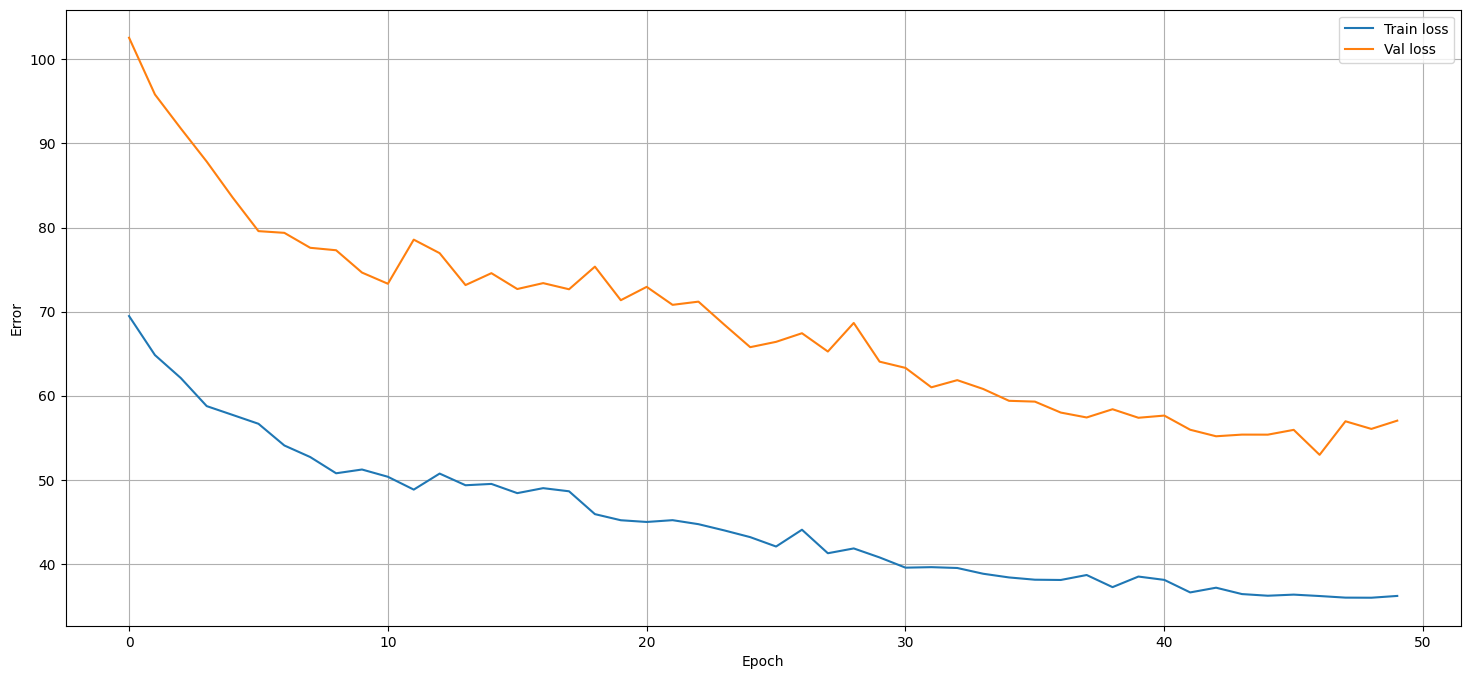

In [27]:
plot_loss(history)

### According to the graph you see, is there a need to continue training the model?

If so, **continue** training (do not start the train from scratch).

Plot the losses again and check whether there is a need to continue training + check which epoch has the best results.

In [ ]:
history = model.fit(
    x=X_train, y=y_train,
    batch_size=32, epochs=100,
    validation_split=0.2, shuffle=True, verbose=1)

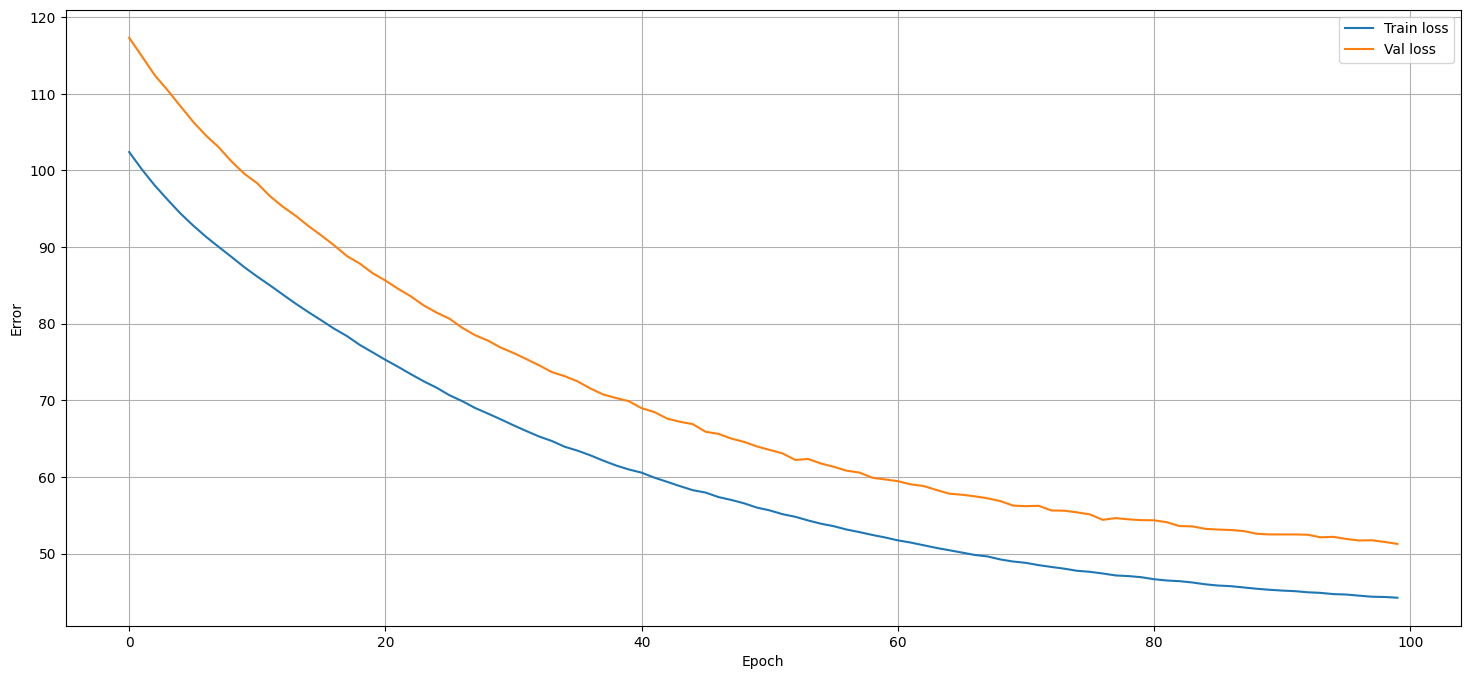

In [ ]:
plot_loss(history)

### Evaluate your model

In [28]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - loss: 51.6125 - mae: 5.3559 - mape: 20.3980 - root_mean_squared_error: 7.1751


[47.23313903808594, 5.252676010131836, 18.61261749267578, 6.872636795043945]

### Plot Residuals of the errors on your test set

In [29]:
residuals = model.predict(X_test).reshape((206,)) - y_test

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) ', ylabel='Count'>

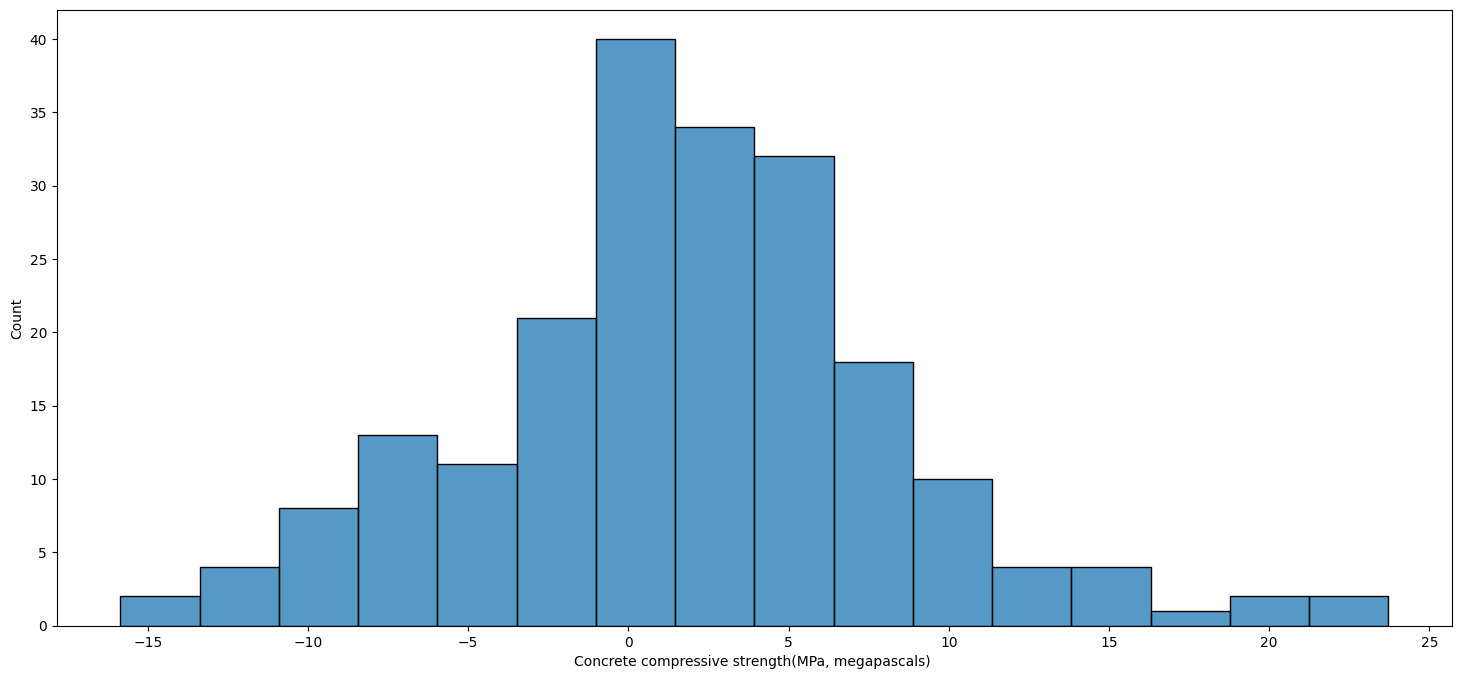

In [30]:
sn.histplot(residuals)

### Try playing with the initial model, it's layers, activation functions, etc to improve the results

### Save your best model as file

In [ ]:
model.save("concrete_model")